<a href="https://colab.research.google.com/github/Kedarnath2605/Kedarnath2605/blob/main/finance_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve


In [3]:
import zipfile

# Unzip the file if it's zipped
with zipfile.ZipFile('/content/Loan_default.csv.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/')

df = pd.read_csv("/content/Loan_default.csv")
df.head()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


In [4]:
df.shape


(255347, 18)

In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LoanID          255347 non-null  object 
 1   Age             255347 non-null  int64  
 2   Income          255347 non-null  int64  
 3   LoanAmount      255347 non-null  int64  
 4   CreditScore     255347 non-null  int64  
 5   MonthsEmployed  255347 non-null  int64  
 6   NumCreditLines  255347 non-null  int64  
 7   InterestRate    255347 non-null  float64
 8   LoanTerm        255347 non-null  int64  
 9   DTIRatio        255347 non-null  float64
 10  Education       255347 non-null  object 
 11  EmploymentType  255347 non-null  object 
 12  MaritalStatus   255347 non-null  object 
 13  HasMortgage     255347 non-null  object 
 14  HasDependents   255347 non-null  object 
 15  LoanPurpose     255347 non-null  object 
 16  HasCoSigner     255347 non-null  object 
 17  Default   

In [6]:
df.isnull().sum()


,0
LoanID,0
Age,0
Income,0
LoanAmount,0
CreditScore,0
MonthsEmployed,0
NumCreditLines,0
InterestRate,0
LoanTerm,0
DTIRatio,0


In [7]:
###STEP 4: Check Target Variable Distribution###
df['Default'].value_counts()




,count
Default,
0,225694
1,29653


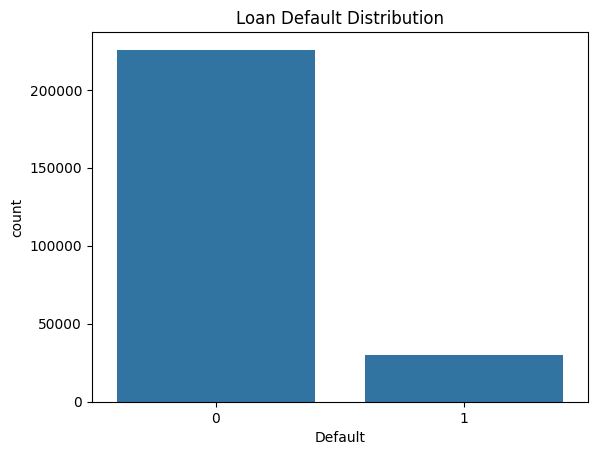

In [8]:
sns.countplot(x='Default', data=df)
plt.title("Loan Default Distribution")
plt.show()


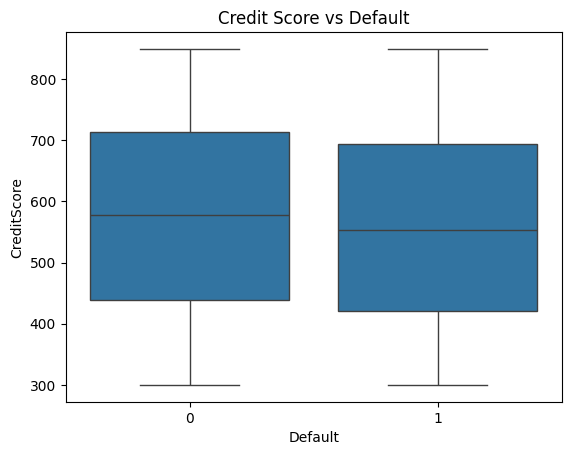

In [9]:
#STEP 5: Exploratory Data Analysis (Important for Report)
#Credit Score vs Default
sns.boxplot(x='Default', y='CreditScore', data=df)
plt.title("Credit Score vs Default")
plt.show()



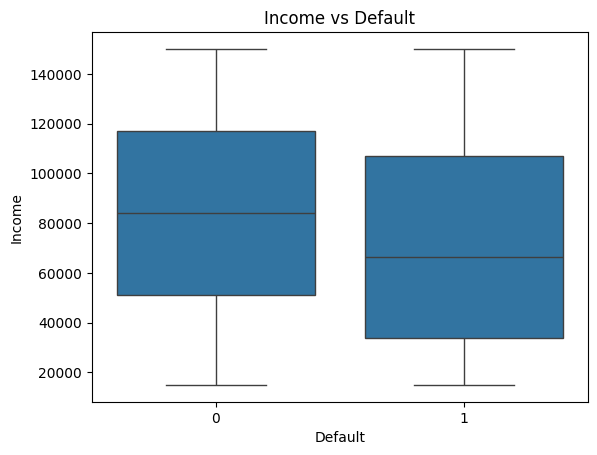

In [10]:
#Income vs Default
sns.boxplot(x='Default', y='Income', data=df)
plt.title("Income vs Default")
plt.show()



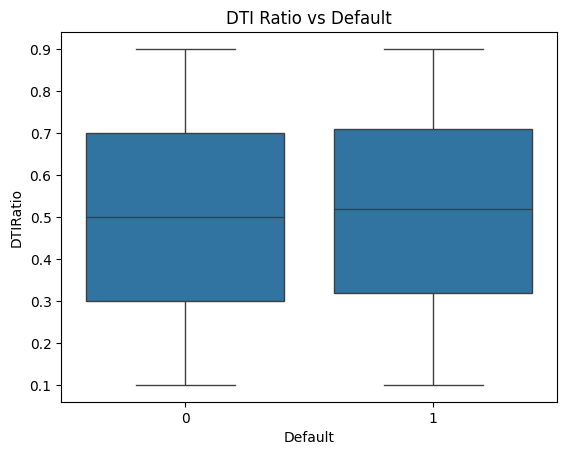

In [11]:
#DTI Ratio vs Default
sns.boxplot(x='Default', y='DTIRatio', data=df)
plt.title("DTI Ratio vs Default")
plt.show()



In [12]:
#STEP 6: Feature Engineering (Create New Risk Indicators)
# Loan Burden
df['Loan_Burden'] = df['LoanAmount'] / df['Income']

# EMI Stress (DTI > 0.4)
df['EMI_Stress'] = np.where(df['DTIRatio'] > 0.4, 1, 0)

# Credit Risk Flag
df['Credit_Risk_Flag'] = np.where(df['CreditScore'] < 600, 1, 0)

df.head()


,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,...,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default,Loan_Burden,EMI_Stress,Credit_Risk_Flag
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,...,Full-time,Divorced,Yes,Yes,Other,Yes,0,0.588262,1,1
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,...,Full-time,Married,No,No,Other,Yes,0,2.467481,1,1
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,...,Unemployed,Divorced,Yes,Yes,Auto,No,1,1.534154,0,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,...,Full-time,Married,No,No,Business,No,0,1.412638,0,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,...,Unemployed,Divorced,No,Yes,Auto,No,0,0.447179,1,0


In [14]:
#STEP 7: Encode Categorical Variables
categorical_cols = [
    'Education',
    'EmploymentType',
    'MaritalStatus',
    'HasMortgage',
    'HasDependents',
    'LoanPurpose',
    'HasCoSigner'
]

le = LabelEncoder()

for col in categorical_cols:
    df[col] = le.fit_transform(df[col])


In [17]:
#STEP 8: Define Features (X) and Target (y)
X = df.drop(['LoanID', 'Default'], axis=1)
y = df['Default']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42,
    stratify=y
)

In [18]:
#STEP 9: Split Data (Train & Test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42,
    stratify=y
)


In [19]:
#STEP 10: Feature Scaling
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [20]:
#STEP 11: Build Logistic Regression Model
model = LogisticRegression(max_iter=1000)

model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [21]:
#STEP 12: Make Predictions
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:,1]



In [22]:
#STEP 13: Evaluate Model
print("Accuracy:", accuracy_score(y_test, y_pred))



Accuracy: 0.886639253312447


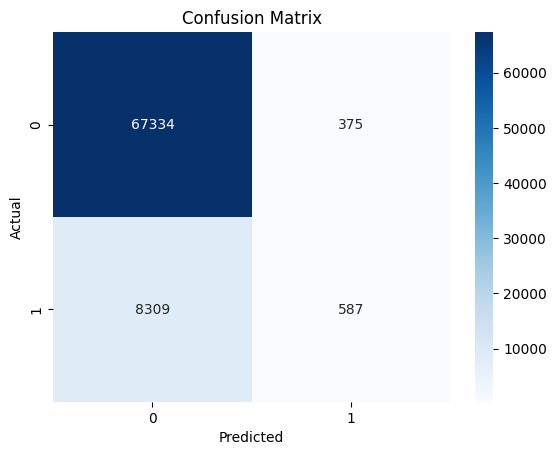

In [23]:
#Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()



In [24]:
#Classification Report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.89      0.99      0.94     67709
           1       0.61      0.07      0.12      8896

    accuracy                           0.89     76605
   macro avg       0.75      0.53      0.53     76605
weighted avg       0.86      0.89      0.84     76605



In [25]:
#ROC-AUC Score
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob))


ROC-AUC Score: 0.7594557425364852


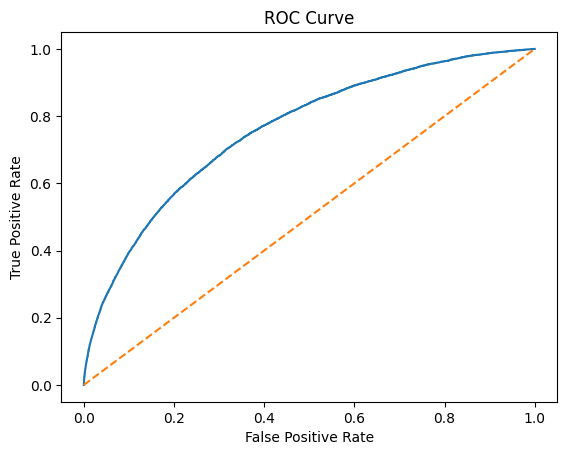

In [26]:
#ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)

plt.plot(fpr, tpr)
plt.plot([0,1], [0,1], '--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()


In [30]:
#STEP 14: Risk Segmentation (Final Business Output)
df['Default_Probability'] = model.predict_proba(
    scaler.transform(X)
)[:,1]

df['Risk_Category'] = pd.cut(
    df['Default_Probability'],
    bins=[0, 0.3, 0.6, 1],
    labels=['Low Risk', 'Medium Risk', 'High Risk']
)

df[['Default_Probability', 'Risk_Category']].head()


,Default_Probability,Risk_Category
0,0.028053,Low Risk
1,0.023943,Low Risk
2,0.182086,Low Risk
3,0.124511,Low Risk
4,0.057587,Low Risk


In [31]:
df.to_csv("Credit_Risk_Final.csv", index=False)


In [33]:
df['Default'].value_counts(normalize=True)


,proportion
Default,
0,0.883872
1,0.116128


In [34]:
!pip install imbalanced-learn


In [35]:
from imblearn.over_sampling import SMOTE


In [36]:
#Apply SMOTE (ONLY on Training Data)
smote = SMOTE(random_state=42)

X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


In [37]:
#Check new balance:
pd.Series(y_train_resampled).value_counts()


,count
Default,
0,157985
1,157985


In [38]:
#PART 2 — LOGISTIC REGRESSION (WITH BALANCED DATA)
log_model = LogisticRegression(max_iter=1000)

log_model.fit(X_train_resampled, y_train_resampled)

y_pred_log = log_model.predict(X_test)
y_prob_log = log_model.predict_proba(X_test)[:,1]


In [39]:
#Evaluate Logistic Regression
print("Logistic Regression Accuracy:",
      accuracy_score(y_test, y_pred_log))

print("Logistic ROC-AUC:",
      roc_auc_score(y_test, y_prob_log))


Logistic Regression Accuracy: 0.6922655179165851
Logistic ROC-AUC: 0.7590246084306402


In [40]:
#PART 3 — ADD RANDOM FOREST MODEL
from sklearn.ensemble import RandomForestClassifier


In [43]:
#STEP 6: Train Random Forest
rf_model = RandomForestClassifier(
    n_estimators=100,
    random_state=42
)

rf_model.fit(X_train_resampled, y_train_resampled)


RandomForestClassifier(random_state=42)

In [44]:
#STEP 7: Predictions
y_pred_rf = rf_model.predict(X_test)
y_prob_rf = rf_model.predict_proba(X_test)[:,1]


In [45]:
#STEP 8: Evaluate Random Forest
print("Random Forest Accuracy:",
      accuracy_score(y_test, y_pred_rf))

print("Random Forest ROC-AUC:",
      roc_auc_score(y_test, y_prob_rf))


Random Forest Accuracy: 0.8784674629593369
Random Forest ROC-AUC: 0.7342576998267872


In [46]:
#PART 4 — Compare Both Models
print("Logistic ROC-AUC:",
      roc_auc_score(y_test, y_prob_log))

print("Random Forest ROC-AUC:",
      roc_auc_score(y_test, y_prob_rf))


Logistic ROC-AUC: 0.7590246084306402
Random Forest ROC-AUC: 0.7342576998267872


In [47]:
importances = rf_model.feature_importances_

feature_names = X.columns

importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

importance_df.head(10)


,Feature,Importance
0,Age,0.115903
10,EmploymentType,0.097534
6,InterestRate,0.085121
5,NumCreditLines,0.082366
9,Education,0.080472
16,Loan_Burden,0.071308
4,MonthsEmployed,0.065522
14,LoanPurpose,0.063595
7,LoanTerm,0.061753
1,Income,0.051705


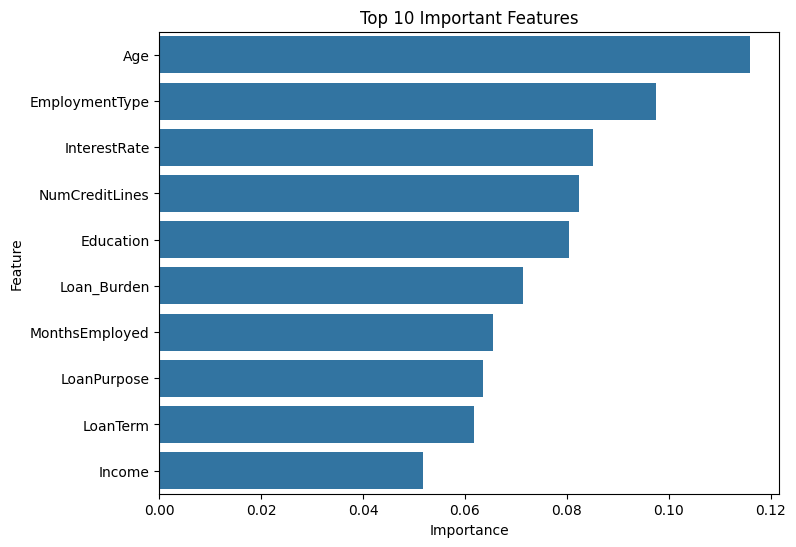

In [48]:
plt.figure(figsize=(8,6))
sns.barplot(x='Importance', y='Feature',
            data=importance_df.head(10))
plt.title("Top 10 Important Features")
plt.show()
